In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc
from IPython.display import HTML
from brian2.units import *

In [89]:
data = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_analysis_141919_21122017.npz")
metadata = np.load("D:/Work/Neurogenesis-PhD/simulation_statistics/batch_ec0028a3a19c60e1b1ae0c57088d6c0c.npz")
print data['recording_archive_name']
print 'Total time taken for simulations:', metadata['total_time']

..\synaptogenesis\ec0028a3a19c60e1b1ae0c57088d6c0c\case3_run9_@ec0028a3a19c60e1b1ae0c57088d6c0c.npz
Total time taken for simulations: 4:40:54.304016


In [90]:
snapshots = data['snapshots']
params = data['params']
dt = np.dtype([('rate', 'float'), 
               ('number_ff_synapses', 'float'), 
               ('final_weight_proportion', 'float'), 
               ('init_mean_std', 'float'),
               ('fin_mean_std_conn_shuf', 'float'),
               ('fin_mean_std_conn', 'float'),
               ('wsr_sigma_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_std_weight_shuf', 'float'),
               ('fin_mean_std_weight', 'float'),
               ('wsr_sigma_fin_weight_fin_weight_shuffle', 'float'),
               ('init_mean_AD', 'float'),
               ('fin_mean_AD_conn_shuf', 'float'),
               ('fin_mean_AD_conn', 'float'),
               ('wsr_AD_fin_conn_fin_conn_shuffle', 'float'),
               ('fin_mean_AD_weight_shuf', 'float'),
               ('fin_mean_AD_weight', 'float'),
               ('wsr_AD_fin_weight_fin_weight_shuffle', 'float'),
#                ('file_path', 'S59')
              ])
results = np.array(data['results'][:, :-1], dtype=dt)

parameters_of_interest = metadata['parameters_of_interest']

In [91]:
# These are all wrong (except case), parameters all are default
parameters_of_interest

array(['case'],
      dtype='|S4')

In [92]:
# all_mean_sigmas,
# all_mean_ADs,
# all_mean_sigmas_conn,
# all_mean_ADs_conn,
# file
snapshots.shape

(30L, 5L)

In [93]:
assert params.shape[0] == snapshots.shape[0]

In [94]:
all_mean_sigmas_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_1 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_1 = [all_mean_sigmas_case_1, all_mean_ads_case_1, all_mean_sigmas_conn_case_1, all_mean_ads_conn_case_1]

all_mean_sigmas_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_2 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_2 = [all_mean_sigmas_case_2, all_mean_ads_case_2, all_mean_sigmas_conn_case_2, all_mean_ads_conn_case_2]

all_mean_sigmas_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_sigmas_conn_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
all_mean_ads_conn_case_3 = np.empty((snapshots[0][0].shape[0], snapshots[0][0].shape[0]))
cases_3 = [all_mean_sigmas_case_3, all_mean_ads_case_3, all_mean_sigmas_conn_case_3, all_mean_ads_conn_case_3]

cases = np.asarray([cases_1, cases_2, cases_3])

In [95]:
snapshots[0][0].shape[0]

10L

In [96]:
snapshots.shape

(30L, 5L)

In [97]:
cases.shape

(3L, 4L, 10L, 10L)

In [105]:
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_1[row, :] = snapshots[row][0]
    all_mean_ads_case_1[row, :] = snapshots[row][1]
    all_mean_sigmas_conn_case_1[row, :] = snapshots[row][2]
    all_mean_ads_conn_case_1[row, :] = snapshots[row][3]
    
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][0]
    all_mean_ads_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][1]
    all_mean_sigmas_conn_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][2]
    all_mean_ads_conn_case_2[row, :] = snapshots[snapshots[0][0].shape[0] + row][3]    
    
    
for row in range(0, snapshots[0][0].shape[0]):
    all_mean_sigmas_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][0]
    all_mean_ads_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][1]
    all_mean_sigmas_conn_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][2]
    all_mean_ads_conn_case_3[row, :] = snapshots[2*snapshots[0][0].shape[0] + row][3]  

In [128]:
hardcoded_t_record = 30000 * msecond
hardcoded_init_mean_std = 2.35
hardcoded_init_mean_ad = 0.81

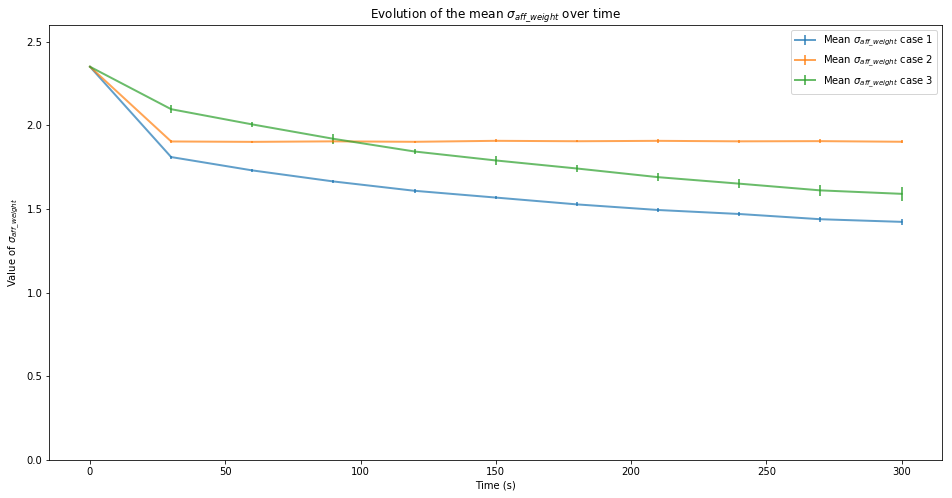

In [135]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], np.std(all_mean_sigmas_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], np.std(all_mean_sigmas_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], np.std(all_mean_sigmas_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff\_weight}$ case 1', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff\_weight}$ case 2', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff\_weight}$ case 3', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff\_weight}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff\_weight}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 2.6])


ax1.legend(loc='best')
plt.savefig("mean_std_evo_with_errorbars.png")

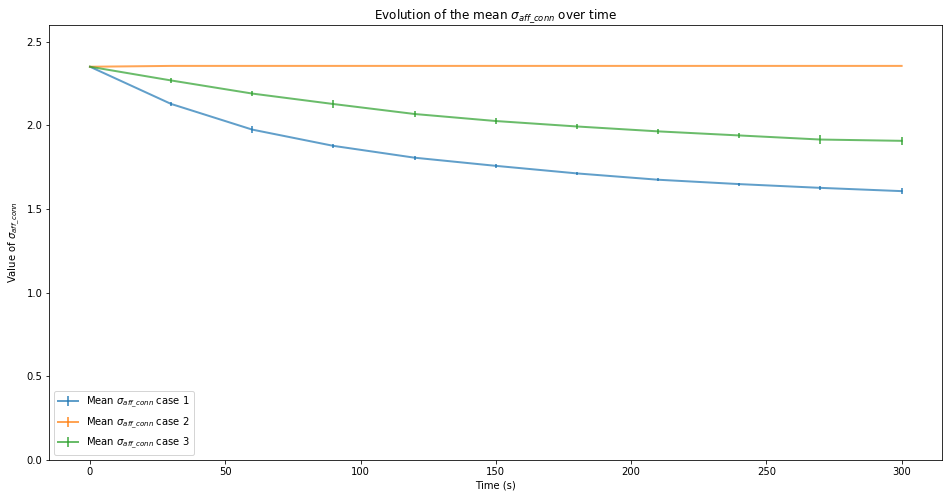

In [136]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_conn_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_conn_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_std], np.mean(all_mean_sigmas_conn_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], np.std(all_mean_sigmas_conn_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], np.std(all_mean_sigmas_conn_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], np.std(all_mean_sigmas_conn_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $\sigma_{aff\_conn}$ case 1', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $\sigma_{aff\_conn}$ case 2', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $\sigma_{aff\_conn}$ case 3', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $\sigma_{aff\_conn}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $\sigma_{aff\_conn}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff_conn}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 2.6])


ax1.legend(loc='best')
plt.savefig("mean_std_conn_evo_with_errorbars.png")

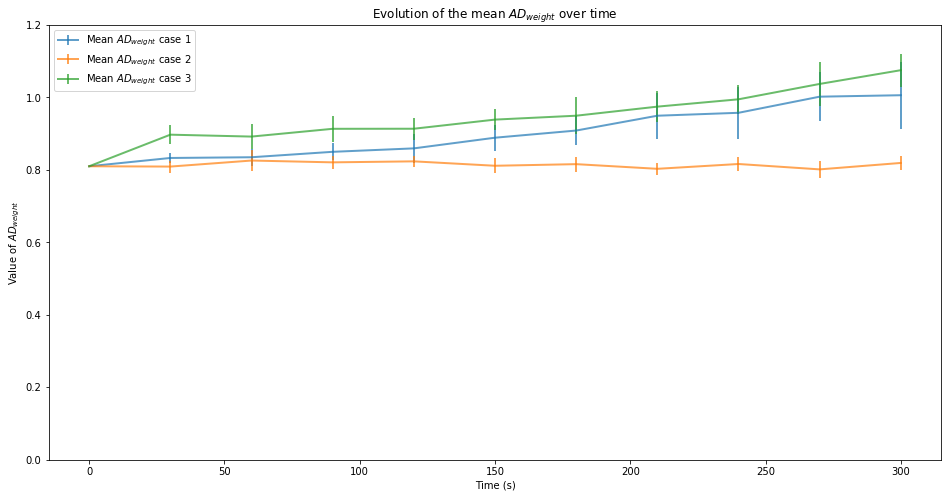

In [143]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], np.std(all_mean_ads_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], np.std(all_mean_ads_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], np.std(all_mean_ads_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $AD_{weight}$ case 1', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $AD_{weight}$ case 2', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $AD_{weight}$ case 3', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $AD_{weight}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $AD_{weight}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 1.2])


ax1.legend(loc='best')
plt.savefig("mean_ad_evo_with_errorbars.png")

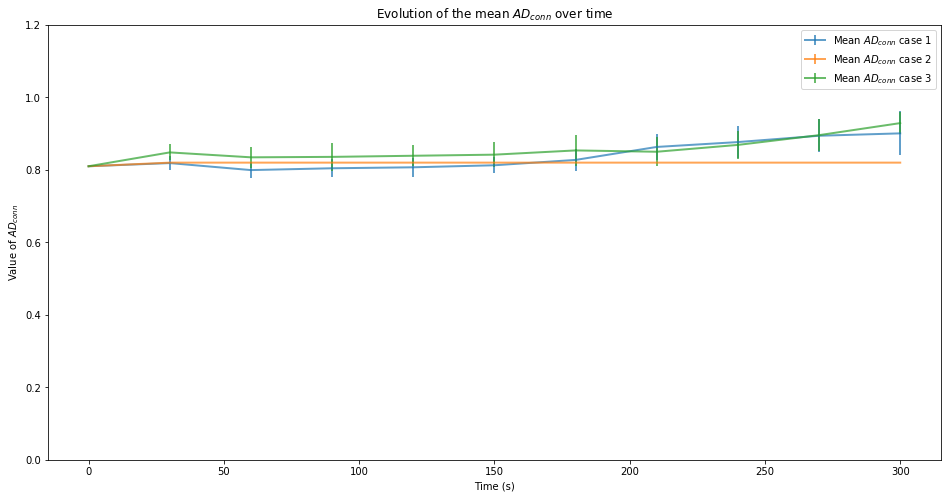

In [144]:
f, (ax1) = plt.subplots(1, 1 ,figsize=(16, 8), dpi=600)
conc_std_1 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_conn_case_1, axis=0)))
conc_std_2 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_conn_case_2, axis=0)))
conc_std_3 = np.concatenate(([hardcoded_init_mean_ad], np.mean(all_mean_ads_conn_case_3, axis=0)))

conc_std_1_std = np.concatenate(([0], np.std(all_mean_ads_conn_case_1, axis=0)))
conc_std_2_std = np.concatenate(([0], np.std(all_mean_ads_conn_case_2, axis=0)))
conc_std_3_std = np.concatenate(([0], np.std(all_mean_ads_conn_case_3, axis=0)))


i = \
ax1.errorbar(np.arange(conc_std_1.size) * hardcoded_t_record, conc_std_1, conc_std_1_std, label='Mean $AD_{conn}$ case 1', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_2.size) * hardcoded_t_record, conc_std_2, conc_std_2_std, label='Mean $AD_{conn}$ case 2', alpha=.7, linewidth=2)
ax1.errorbar(np.arange(conc_std_3.size) * hardcoded_t_record, conc_std_3, conc_std_3_std, label='Mean $AD_{conn}$ case 3', alpha=.7, linewidth=2)
# ax1.plot(np.arange(all_mean_sigmas_case_3.size+1) * hardcoded_t_record, conc_case_3, label='Mean $\sigma_{aff}$ case 3 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--')
# ax1.plot(np.arange(all_mean_sigmas_case_1_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input, label='Mean $\sigma_{aff}$ case 1 non-lesioned Gaussian input', alpha=.7, linewidth=2, ls=':', c='k' )
# ax1.plot(np.arange(all_mean_sigmas_case_1_lesioned_gaussian_input.size+1) * hardcoded_t_record, conc_case_1_gaussian_input_lesioned, label='Mean $\sigma_{aff}$ case 1 lesioned Gaussian input', alpha=.7, linewidth=2, ls='--',c='b' )



ax1.grid(visible=False)
ax1.set_title("Evolution of the mean $AD_{conn}$ over time")
# ax1.set_ylim([0, np.max([conc_std_1, conc_std_2, conc_std_3]) + 0.2])
ax1.set_xlabel("Time (" + str(hardcoded_t_record.dimensions) + ")")
ax1.set_ylabel("Value of $AD_{conn}$")

# ax1.scatter(0, hardcoded_init_mean_std, marker='x', c='r', label="Initial mean $\sigma_{aff}$ in the original, non-lesioned case")
# ax1.scatter(conc_std_1.size* hardcoded_t_record//2, 1.42, c='r', label="Final mean $\sigma_{aff}$ in the original, non-lesioned case")
ax1.set_ylim([0, 1.2])


ax1.legend(loc='best')
plt.savefig("mean_ad_conn_evo_with_errorbars.png")